**CONTEXT :** A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.


**DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

**PROJECT OBJECTIVE:** To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding & Exploration: 

In [5]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
print(df1.sample(1))
print("**"*25)
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
print(df2.sample())
print("**"*25)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
3578  4795-WRNVT  Female              0      No         No      40   

     PhoneService MultipleLines InternetService OnlineSecurity  
3578          Yes            No             DSL            Yes  
**************************************************
      customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
3319  3866-MDTUB           No               No          No         Yes   

     StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
3319             Yes  Month-to-month              Yes  Electronic check   

      MonthlyCharges TotalCharges Churn  
3319           70.75        146.9   Yes  
**************************************************


In [6]:
print(df1.info())
print("**"*25)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   objec

In [15]:
df = pd.merge(df1,df2,on = 'customerID')

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Checking the column names
for i in  df.columns.values:
    if i in df1.columns.values or i in df2.columns.values:
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


### Data Cleaning & Analysis

In [23]:
print(df.duplicated().sum())
print("***"*25)
print(df.isna().sum())

0
***************************************************************************
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [26]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','0').astype('float')
df['TotalCharges'] = np.where(df['TotalCharges']==0,df['TotalCharges'].mean(),df['TotalCharges'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Enter the one categorical variablegender
Enter another categorical variableInternetService
gender
InternetService


gender                Female                                  Male  \
InternetService          DSL  Fiber optic          No          DSL   
MonthlyCharges     58.590741    91.472569   21.110710    57.631427   
SeniorCitizen       0.103535     0.273020    0.028112     0.110300   
TotalCharges     2138.099737  3166.033645  678.500849  2102.795648   
tenure             32.822391    32.389569   31.024096    32.820762   

gender                                    
InternetService  Fiber optic          No  
MonthlyCharges     91.527868   21.048973  
SeniorCitizen       0.263772    0.039795  
TotalCharges     3244.830006  664.920631  
tenure             33.449773   30.089859

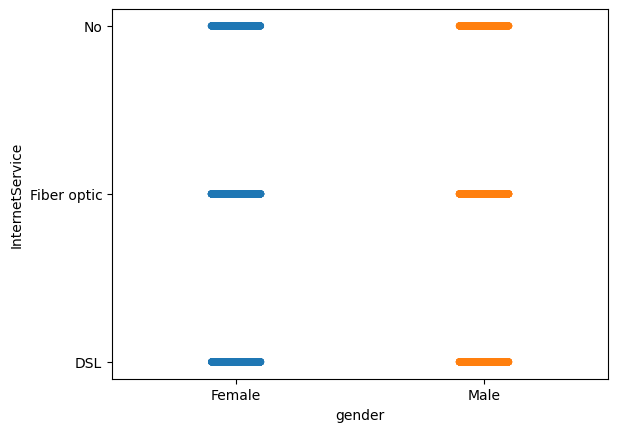

In [28]:
# Using the DataFrame obtained from previous step, plot two suitable charts and pivot table for all the Categorical features. [8 Marks]

col1 = input("Enter the one categorical variable")
col2 = input("Enter another categorical variable")

print(col1)
print(col2)

sns.stripplot(x = col1, y=col2, data = df)  
pd.pivot_table(df, columns=[col1, col2])              
            

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
X = df.drop(["customerID","Churn"],axis = 1)

In [31]:
X = pd.get_dummies(X,drop_first= True)

In [32]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [34]:
X.shape

(7043, 31)

In [35]:
y = df["Churn"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.3,random_state = 42)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model building and Improvement

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint

In [45]:
%%time
model = GradientBoostingClassifier()
param = {
    'learning_rate': uniform(.05, .1)
    , 'subsample': uniform(.2, .3)
    , 'n_estimators': randint(20, 100)
    , 'min_samples_split': randint(20, 40)
    , 'ccp_alpha': uniform(0, .7)
    , 'max_depth': randint(1, 10)
}

randomsearch = RandomizedSearchCV(model, param_distributions=param, n_iter=30, n_jobs=-1, scoring='accuracy', return_train_score=True)

randomsearch.fit(X_train, y_train)
print('best score of Randomized Search over 10 iterations:', randomsearch.best_score_)

best score of Randomized Search over 10 iterations: 1.0
Wall time: 14.2 s


In [46]:
randomsearch.best_params_

{'ccp_alpha': 0.10540046964227534,
 'learning_rate': 0.1298259844450414,
 'max_depth': 6,
 'min_samples_split': 39,
 'n_estimators': 44,
 'subsample': 0.279933833874478}

In [48]:
y_pred = randomsearch.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1539
         Yes       1.00      1.00      1.00       574

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


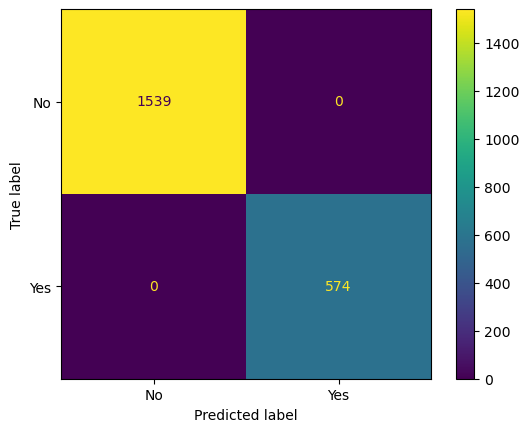

In [50]:
plot_confusion_matrix(randomsearch,X_test,y_test)

In [51]:
from sklearn.model_selection import GridSearchCV

In [54]:
%%time
param = {
    'learning_rate': [0.005, .1]
    , 'subsample': [.2, .3 ,.4, .5]
    , 'n_estimators': [25, 50]
    , 'min_samples_split': [20, 25, 30]
    , 'ccp_alpha': [0.1, 0.2, 0.3, 0.4, 0.5]
    , 'max_depth': list(range(1, 10, 2))
}

model = GradientBoostingClassifier() #input hyperparameters without tuning
gridsearch = GridSearchCV(model, param_grid=param, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
gridsearch.fit(X_train, y_train)
print('best score of Grid Search over the entire iterations:', gridsearch.best_score_)

best score of Grid Search over the entire iterations: 1.0
Wall time: 2min 8s


In [55]:
for k,v in (gridsearch.best_params_).items():
    print("Best value for %s is %.2f"%(k,v))
    print('-'*50)

Best value for ccp_alpha is 0.10
--------------------------------------------------
Best value for learning_rate is 0.10
--------------------------------------------------
Best value for max_depth is 1.00
--------------------------------------------------
Best value for min_samples_split is 20.00
--------------------------------------------------
Best value for n_estimators is 25.00
--------------------------------------------------
Best value for subsample is 0.20
--------------------------------------------------


In [62]:
y_pred = gridsearch.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1539
         Yes       1.00      1.00      1.00       574

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


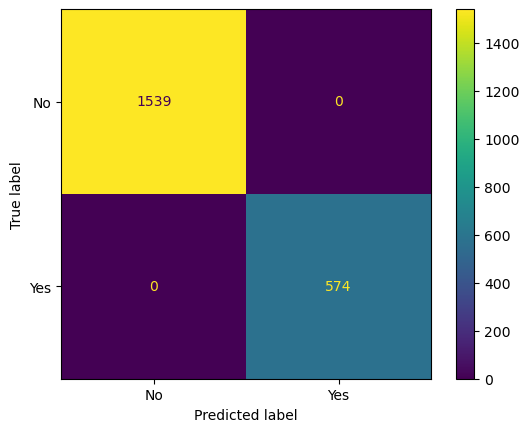

In [64]:
plot_confusion_matrix(gridsearch,X_test,y_test)